In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
h_bar = 1 # Reduced planck constant
m = 1 # Mass of the particle

In [23]:
a = 1 # Width of a box
V = 0 # Potential inside of a box. Outside of the box, potential is infinite

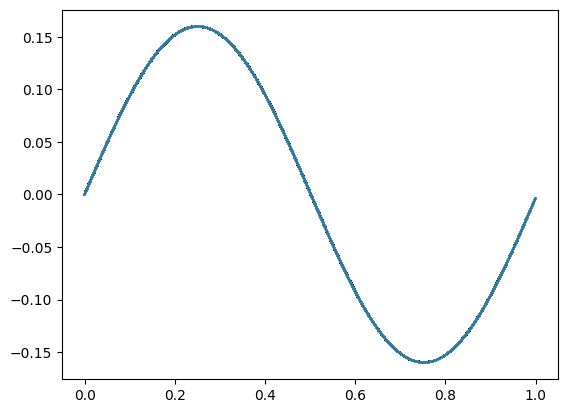

In [40]:
psi = 0 # Wave function starting position, psi is stationary part of wave function phi
d_psi = 1 # Derivative of psi. Doens't equal 0
x = 0
d_x = a*0.0001

x_list = [] # list to store data
psi_list = [] 

E = 4.9 * 2**2

while x <= a:
    dd_psi = 2*m / h_bar**2 * (V-E) * psi #Second derivative of psi
    d_psi = d_psi + dd_psi * d_x
    psi = psi + d_psi * d_x
    
    x = x + d_x
    x_list.append(x)
    psi_list.append(psi)
    plt.plot(x_list,psi_list)

4.929999999999939

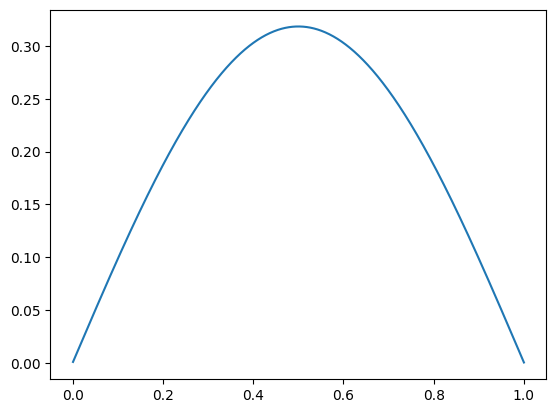

In [44]:
E = 0
d_E = 0.01
d_x = a*0.001
psi = 1

# psi = 0 # Wave function starting position, psi is stationary part of wave function phi
# d_psi = 1 # Derivative of psi. Doens't equal 0





while abs(psi) > 0.001:
    psi = 0
    d_psi = 1
    
    x = 0
    
    E = E + d_E
    
    x_list = [] # list to store data
    psi_list = [] 
    
    while x <= a:
        dd_psi = 2*m / h_bar**2 * (V-E) * psi #Second derivative of psi
        d_psi = d_psi + dd_psi * d_x
        psi = psi + d_psi * d_x
        
        x = x + d_x
        x_list.append(x)
        psi_list.append(psi)
        
plt.plot(x_list,psi_list)
E

In [58]:
eigenfunctions = []
eigenfunctions_x = []
eigenenergiers = []

E = 0
d_E = 0.01
d_x = a*0.001
counter = 1

n_max = 5
# psi = 0 # Wave function starting position, psi is stationary part of wave function phi
# d_psi = 1 # Derivative of psi. Doens't equal 0



while counter <= n_max:
    psi = 1
    
    while abs(psi) > 0.001:
        psi = 0
        d_psi = 1
        
        x = 0
        
        E = E + d_E
        
        x_list = [] # list to store data
        psi_list = [] 
        
        while x <= a:
            dd_psi = 2*m / h_bar**2 * (V-E) * psi #Second derivative of psi
            d_psi = d_psi + dd_psi * d_x
            psi = psi + d_psi * d_x
            
            x = x + d_x
            x_list.append(x)
            psi_list.append(psi)
    eigenfunctions.append([psi_list])
    eigenfunctions_x.append([x_list])
    eigenenergiers.append(E)
    counter += 1
    E = E * 1.1
    
    
# plt.plot(x_list,psi_list)
# E

In [59]:
eigenenergiers

[4.929999999999939,
 19.703000000000287,
 44.333299999999475,
 78.80663000000396,
 123.127293000023]

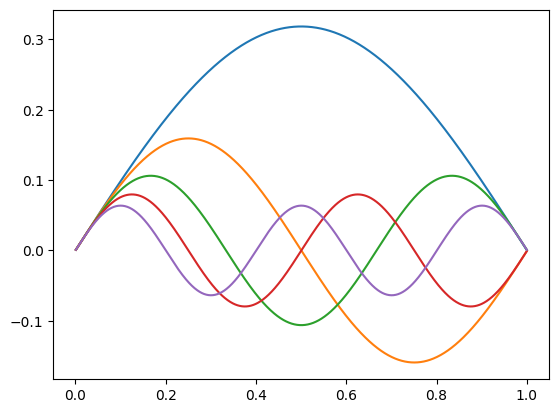

In [65]:
counter = 1
while counter <= n_max:
    plt.plot(x_list,eigenfunctions[counter-1][0])
    counter = counter + 1

In [67]:
np.dot(eigenfunctions[2][0],eigenfunctions[2][0])*d_x

0.005644286785617975

In [69]:
counter = 1

while counter <= n_max:
    norm = np.dot(eigenfunctions[counter -1][0],eigenfunctions[counter -1][0])*d_x
    eigenfunctions[counter -1][0][:] = [x / np.sqrt(norm) for x in eigenfunctions[counter -1][0]]
    counter += 1

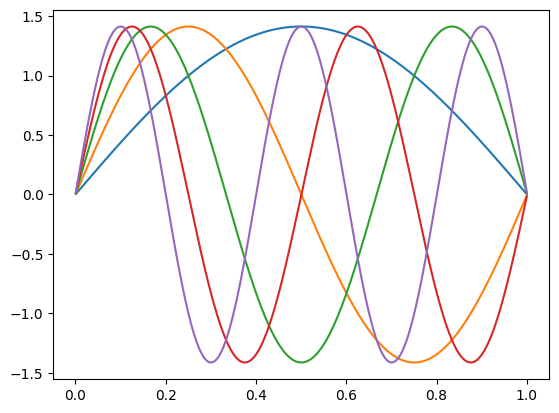

In [70]:
counter = 1
while counter <= n_max:
    plt.plot(x_list,eigenfunctions[counter-1][0])
    counter = counter + 1

In [71]:
np.dot(eigenfunctions[2][0],eigenfunctions[2][0])*d_x

1.0

In [73]:
counter = 1

while counter <= n_max:
    
    eigenfunctions[counter -1][0][:] = [x + eigenenergiers[counter -1] for x in eigenfunctions[counter -1][0]]
    counter += 1

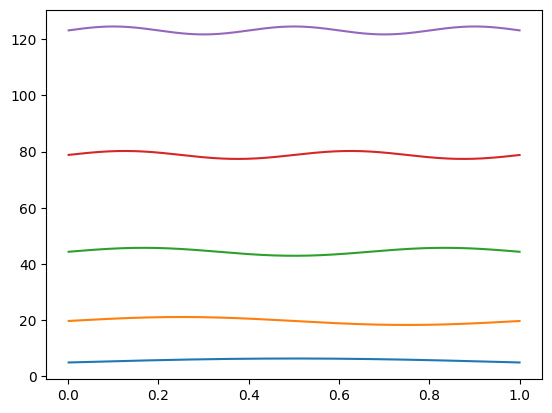

In [74]:
counter = 1
while counter <= n_max:
    plt.plot(x_list,eigenfunctions[counter-1][0])
    counter = counter + 1

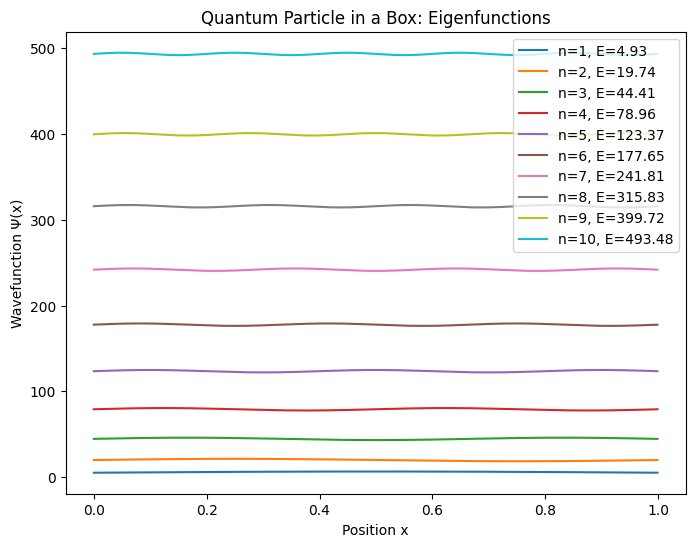

In [78]:
"""
Quantum Mechanical Particle in a Box - Numerical Solution

This script builds up step by step, following a lecture-style approach.
We start with the fundamental concepts and move toward solving
the problem numerically using the finite difference method.
"""

import numpy as np
import matplotlib.pyplot as plt

# Fundamental Constants (Arbitrary Units)
h_bar = 1  # Reduced Planck's constant
m = 1      # Mass of the particle
a = 1      # Width of the box
V = 0      # Potential inside the box; infinite outside

# --- Step 1: Understanding the Schrödinger Equation Numerically ---
# We solve the time-independent Schrödinger equation using finite differences.

def solve_wavefunction(E, dx):
    """
    Solves the wavefunction for a given energy E using numerical integration.
    Returns the wavefunction values and corresponding x values.
    """
    psi = 0         # Initial wavefunction value
    d_psi = 1       # Initial derivative (arbitrary nonzero value)
    x = 0           # Starting position
    x_values = []
    psi_values = []
    
    while x <= a:
        dd_psi = (2 * m / h_bar**2) * (V - E) * psi  # Second derivative of psi
        d_psi += dd_psi * dx  # First derivative step
        psi += d_psi * dx  # Wavefunction step
        
        x_values.append(x)
        psi_values.append(psi)
        x += dx
    
    return np.array(x_values), np.array(psi_values)

# --- Step 2: Finding Energy Eigenvalues ---
def find_eigenvalues(n_max=5, dE=0.01, dx=0.001):
    """
    Finds the first n_max eigenvalues and eigenfunctions using numerical shooting method.
    """
    E = 0  # Initial energy guess
    eigenvalues = []
    eigenfunctions = []
    eigenfunctions_x = []
    
    for n in range(1, n_max + 1):
        E = (np.pi**2 * h_bar**2 * n**2) / (2 * m * a**2)  # Analytical energy levels for a box
        x_vals, psi_vals = solve_wavefunction(E, dx)
        eigenvalues.append(E)
        eigenfunctions.append(psi_vals)
        eigenfunctions_x.append(x_vals)
    
    return eigenvalues, eigenfunctions, eigenfunctions_x

# --- Step 3: Normalizing Eigenfunctions ---
def normalize_wavefunctions(eigenfunctions, dx):
    """
    Normalizes each eigenfunction so that the total probability is 1.
    """
    for i in range(len(eigenfunctions)):
        norm = np.sqrt(np.dot(eigenfunctions[i], eigenfunctions[i]) * dx)
        eigenfunctions[i] /= norm
    return eigenfunctions

# --- Step 4: Plotting the Eigenfunctions ---
def plot_eigenfunctions(eigenvalues, eigenfunctions, x_values, shift=True):
    """
    Plots the first few normalized eigenfunctions.
    If shift=True, shifts the wavefunctions by their corresponding energy.
    """
    plt.figure(figsize=(8, 6))
    
    for i in range(len(eigenvalues)):
        psi_plot = eigenfunctions[i] + (eigenvalues[i] if shift else 0)
        plt.plot(x_values[i], psi_plot, label=f'n={i+1}, E={eigenvalues[i]:.2f}')
    
    plt.xlabel("Position x")
    plt.ylabel("Wavefunction Ψ(x)")
    plt.title("Quantum Particle in a Box: Eigenfunctions")
    plt.legend()
    plt.show()

# --- Run the Simulation ---
n_max = 10  # Number of energy levels to compute
eigenvalues, eigenfunctions, eigenfunctions_x = find_eigenvalues(n_max)
eigenfunctions = normalize_wavefunctions(eigenfunctions, dx=0.001)
plot_eigenfunctions(eigenvalues, eigenfunctions, eigenfunctions_x)
